<a href="https://colab.research.google.com/github/kleofas97/HandwritingRecognition/blob/preprocessing/segmentation_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testowy Notebook dla sprawdzenia możliwości Google Vision, OpenCV i jednego z internetowych rozwiązań w celu oddzielenia linijek ręcznie pisanego tekstu


In [ ]:
!pip install --upgrade pip


Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.3)
Requirement already up-to-date: google-api-python-client in /usr/local/lib/python3.6/dist-packages (1.12.3)


# Set up the picture

```
# Sformatowano jako kod
```



In [ ]:
import os, io
import numpy as np
import pandas as pd
import cv2
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

**Fragment księgi urodzin dla testów**

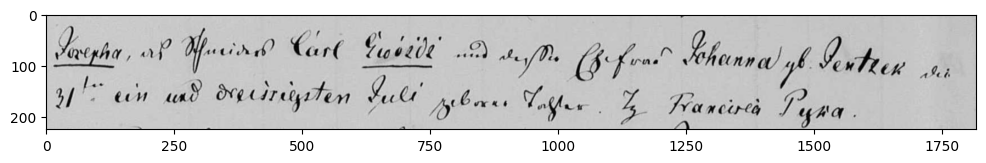

In [ ]:
IMAGE_FILE = "testowy2.png"
FILE_PATH =  IMAGE_FILE
I = testim = mpimg.imread(IMAGE_FILE)
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(testim)

# Google Vision

In [ ]:
!pip install --upgrade google-api-python-client
!pip install google-cloud-vision
from google.cloud import vision
from google.cloud.vision import types

In [ ]:
import getpass

APIKEY = getpass.getpass()

··········


In [ ]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'keyFile.json'
client = vision.ImageAnnotatorClient()

In [ ]:

with io.open(FILE_PATH, 'rb') as image_file:
    content = image_file.read()

image = vision.types.Image(content=content)
response = client.document_text_detection(image=image)

docText = response.full_text_annotation.text
print(docText)


pages = response.full_text_annotation.pages
for page in pages:
    for block in page.blocks:
        print('block confidence:', block.confidence)

        for paragraph in block.paragraphs:
            print('paragraph confidence:', paragraph.confidence)

            for word in paragraph.words:
                word_text = ''.join([symbol.text for symbol in word.symbols])

                print('Word text: {0} (confidence: {1}'.format(word_text, word.confidence))

                for symbol in word.symbols:
                    print('\tSymbol: {0} (confidence: {1}'.format(symbol.text, symbol.confidence))

AttributeError: ignored

# Simple OpenCV



**Spliting image to words using opencv**




In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np

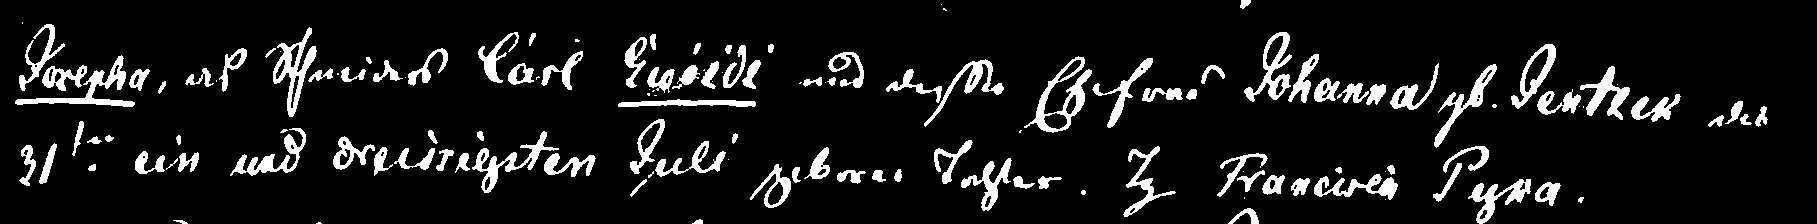

In [ ]:

kernel = np.ones((2,2),np.uint8)
img = cv2.imread("testowy2.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,binary = cv2.threshold(gray,175,255,cv2.THRESH_BINARY_INV)
G_dila =cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
cv2_imshow(G_dila)

In [ ]:
output = cv2.connectedComponentsWithStats( G_dila)

In [ ]:
img = cv2.imread("testowy2.png")
for_rect = img.copy()
m_kernel = np.ones((5,5),np.uint8)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# gray = gray.reshape(gray.shape[0],gray.shape[1],1)
_,binary = cv2.threshold(gray,170,255,cv2.THRESH_BINARY_INV)
G_dila =cv2.morphologyEx(binary, cv2.MORPH_CLOSE, m_kernel)
for i in range(output[0]): 
      cv2.rectangle(for_rect, (output[2][i][0], output[2][i][1]), (
      output[2][i][0] + output[2][i][2], output[2][i][1] + output[2][i][3]), (255, 56, 23), 2)
cv2_imshow(for_rect)

In [ ]:
ctrs, hier = cv2.findContours(G_dila.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_copy = img.copy()
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # show ROI
    cv2.rectangle(img_copy,(x,y),( x + w, y + h ),(90,0,255),2)

cv2_imshow(img_copy)


NameError: ignored

Ekstremalna dylatacja w celu połączenia tekstu w linie

In [ ]:
kernel = np.ones((1,90), np.uint8)
img_dilation = cv2.dilate(binary, kernel, iterations=2)
cv2_imshow(img_dilation)

In [ ]:

ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_countrs = img.copy()
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    cv2.rectangle(img_countrs,(x,y),( x + w, y + h ),(90,0,255),2)

cv2_imshow(img_countrs)

In [ ]:
output = cv2.connectedComponentsWithStats( img_dilation.copy())
for_rect = img.copy()
for i in range(output[0]): 
  if output[2][i][2] - output[2][i][0] > 100:
      cv2.rectangle(for_rect, (output[2][i][0], output[2][i][1]), (
      output[2][i][0] + output[2][i][2], output[2][i][1] + output[2][i][3]), (255, 56, 23), 2)
cv2_imshow(for_rect)

Transformata Hougha ( czysto testowo - bez większego strojenia )

In [ ]:
for_Hough = img.copy()
dst = cv2.Canny(img, 50, 200, None, 3)
cv2_imshow(dst)
lines = cv2.HoughLines(dst,0.1,np.pi/180,1)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(for_Hough,(x1,y1),(x2,y2),(0,0,255),2)
    

cv2_imshow(for_Hough)

NameError: ignored

# Internet way

Jedno z rozwiązań internetowych: https://www.kaggle.com/irinaabdullaeva/text-segmentation/notebook#Method-#1.

In [ ]:
import math
def createKernel(kernelSize, sigma, theta):
    "create anisotropic filter kernel according to given parameters"
    assert kernelSize % 2 # must be odd size
    halfSize = kernelSize // 2

    kernel = np.zeros([kernelSize, kernelSize])
    sigmaX = sigma
    sigmaY = sigma * theta

    for i in range(kernelSize):
        for j in range(kernelSize):
            x = i - halfSize
            y = j - halfSize

            expTerm = np.exp(-x**2 / (2 * sigmaX) - y**2 / (2 * sigmaY))
            xTerm = (x**2 - sigmaX**2) / (2 * math.pi * sigmaX**5 * sigmaY)
            yTerm = (y**2 - sigmaY**2) / (2 * math.pi * sigmaY**5 * sigmaX)

            kernel[i, j] = (xTerm + yTerm) * expTerm

    kernel = kernel / np.sum(kernel)
    return kernel

In [ ]:
kernelSize=51
sigma=8
theta=1.5
img_trans = np.transpose(gray)
imgFiltered = cv2.filter2D(img_trans, -1, createKernel(kernelSize, sigma, theta), borderType=cv2.BORDER_REPLICATE)
def applySummFunctin(img):
    res = np.sum(img, axis = 0)    #  summ elements in columns
    return res
def normalize(img):
    (m, s) = cv2.meanStdDev(img)
    m = m[0][0]
    s = s[0][0]
    img = img - m
    img = img / s if s>0 else img
    return img
normalized = normalize(imgFiltered)
(m, s) = cv2.meanStdDev(imgFiltered)
summ = applySummFunctin(normalized)
def smooth(x, window_len=11, window='hanning'):
#     if x.ndim != 1:
#         raise ValueError("smooth only accepts 1 dimension arrays.") 
    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.") 
    if window_len<3:
        return x
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'") 
    s = np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w = np.ones(window_len,'d')
    else:
        w = eval('np.'+window+'(window_len)')

    y = np.convolve(w/w.sum(),s,mode='valid')
    return y
windows=['flat', 'hanning', 'hamming', 'bartlett', 'blackman']
smoothed = smooth(summ, 35)
from scipy.signal import argrelmin
mins = argrelmin(smoothed, order=2)
arr_mins = np.array(mins)
plt.plot(smoothed)
plt.plot(arr_mins, smoothed[arr_mins], "x")
plt.show()

In [ ]:
def crop_text_to_lines(text, blanks):
    x1 = 0
    y = 0
    lines = []
    for i, blank in enumerate(blanks):
        x2 = blank
        print("x1=", x1, ", x2=", x2, ", Diff= ", x2-x1)
        line = text[:, x1:x2]
        lines.append(line)
        x1 = blank
    return lines
    
def display_lines(lines_arr, orient='vertical'):
    plt.figure(figsize=(30, 30))
    if not orient in ['vertical', 'horizontal']:
        raise ValueError("Orientation is on of 'vertical', 'horizontal', defaul = 'vertical'") 
    if orient == 'vertical': 
        for i, l in enumerate(lines_arr):
            line = l
            plt.subplot(2, 10, i+1)  # A grid of 2 rows x 10 columns
            plt.axis('off')
            plt.title("Line #{0}".format(i))
            _ = plt.imshow(line, cmap='gray', interpolation = 'bicubic')
            plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    else:
            for i, l in enumerate(lines_arr):
                line = l
                plt.subplot(40, 1, i+1)  # A grid of 40 rows x 1 columns
                plt.axis('off')
                plt.title("Line #{0}".format(i))
                _ = plt.imshow(line, cmap='gray', interpolation = 'bicubic')
                plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
found_lines = crop_text_to_lines(img_trans, arr_mins[0])

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
sess = tf.compat.v1.Session()
found_lines_arr = []
with sess.as_default():
    for i in range(len(found_lines)-1):
        found_lines_arr.append(tf.expand_dims(found_lines[i], -1).eval())
def transpose_lines(lines):
    res = []
    for l in lines:
        line = np.transpose(l)
        res.append(line)
    return res
    
res_lines = transpose_lines(found_lines)

display_lines(res_lines[1:], 'horizontal')
np.shape(res_lines[1])

Problemem pochyłe pismo autora


# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

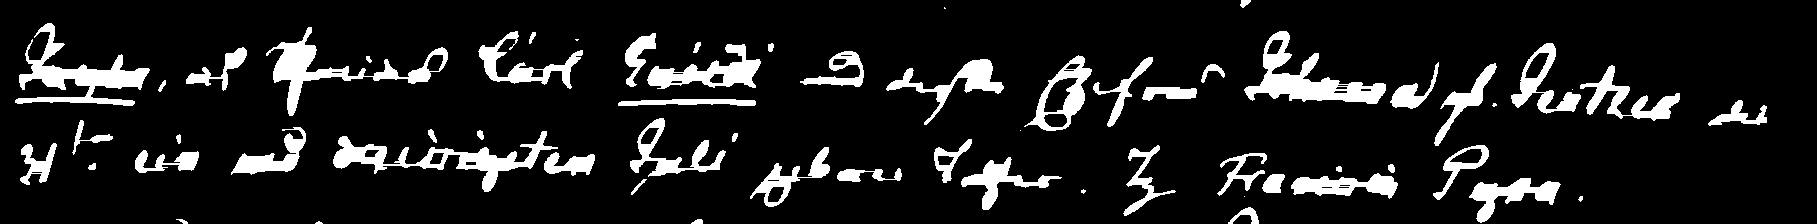

In [ ]:
#preprocess to binary
img = cv2.imread("testowy2.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,binary = cv2.threshold(gray,170,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((1,10))
G_dila =cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
cv2_imshow(G_dila)

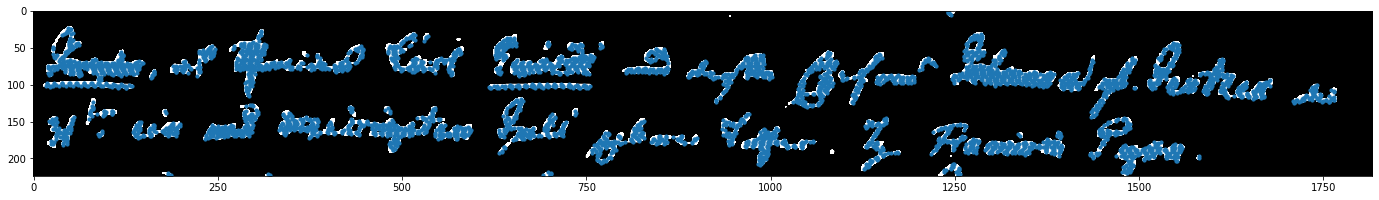

In [ ]:
points = []
for y in range(0,G_dila.shape[0]):
  for x in range(0,G_dila.shape[1]):
    if G_dila[y][x] > 0:
      points.append([y,x])
points_array = np.array(points)
plt.figure(figsize=(24,48))
plt.imshow(G_dila, cmap="gray", vmin=0, vmax=1)
plt.scatter(points_array[0::10,1],points_array[0::10,0],s=10)
plt.show()

In [ ]:
X = StandardScaler().fit_transform(points)
print(X)
db = DBSCAN(eps=0.1,min_samples=3).fit(X)


[[-2.42930367  0.79925613]
 [-2.42930367  0.8012862 ]
 [-2.42930367  0.80331627]
 ...
 [ 2.21850552  0.82970712]
 [ 2.21850552  0.83173719]
 [ 2.21850552  0.83376726]]


In [ ]:
from collections import Counter
Counter(db.labels_)

Counter({0: 57,
         1: 3,
         2: 32504,
         3: 721,
         4: 8685,
         5: 118,
         6: 37,
         7: 3642,
         8: 216,
         9: 31,
         10: 45,
         11: 16})

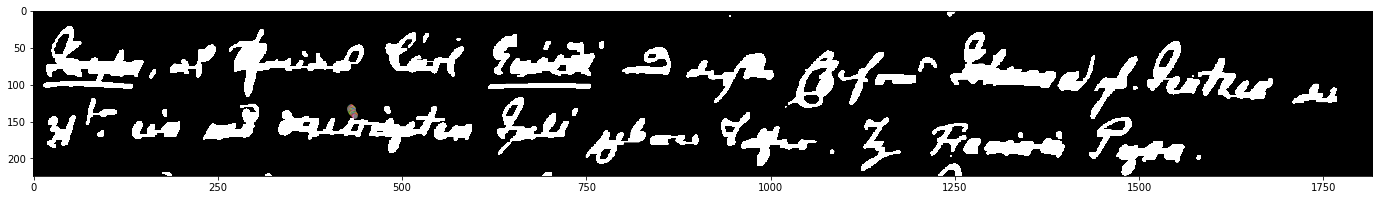

In [ ]:
label_w_points =list(zip(db.labels_,list(points)))
plt.figure(figsize=(24,48))
for label,coord in label_w_points:
  if label== 13:
    plt.scatter(coord[1],coord[0],s=10)
plt.imshow(G_dila, cmap="gray", vmin=0, vmax=1)

plt.show()

ValueError: ignored

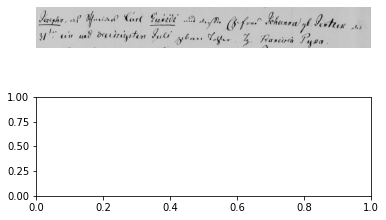

In [ ]:
labels = db.labels_
rows,cols = gray.shape
plt.figure(2)
plt.subplot(2, 1, 1)
plt.imshow(img)
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(np.reshape(labels, [rows, cols]))
plt.axis('off')
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
centers = [[1, 0.5], [2, 2], [1, -1]]
stds = [0.1, 0.4, 0.3]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)
X

array([[ 0.8951447 ,  0.35799821],
       [ 1.17640523,  0.54001572],
       [ 0.85126135, -0.63502669],
       ...,
       [ 2.24284467,  1.58073184],
       [ 2.65263897,  2.15110367],
       [ 0.70827913, -0.59613368]])